In [1]:
"""Read in the right files"""
BindingProfile='/Users/mallu899/Documents/projects/lacI_CG_master/data/fullLength_txt/BindingProfile'
from matplotlib import rc

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import numpy as np
import pandas as pd
font = {'family' : 'Helvetica','size'   : 9,'weight':  'normal'}
rc('font', **font)  # pass in the font dict as kwargs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f_1efa_distance_to_axis = ('/Users/mallu899/Mirror/projects/lacI_CG_master/scripts_and_notebooks/AnalysisPy/Binding/1efa_distancesToAxis.txt','r')
f_NMR = ('/Users/mallu899/Mirror/projects/lacI_CG_master/scripts_and_notebooks/AnalysisPy/ClosestDistances/1osl_ClosestDist.dat')
f_crystal = ('/Users/mallu899/Mirror/projects/lacI_CG_master/scripts_and_notebooks/AnalysisPy/ClosestDistances/1efa_ClosestDist.dat')

In [3]:
p1 = np.array([224/256, 236/256, 244/256, 1])
p2 = np.array([158/256, 160/256, 218/256, 1])
p3 = np.array([136/256, 86/256, 167/256, 1])
g1 = np.array([229/256, 245/256, 249/256, 1])
g2 = np.array([153/256, 216/256, 201/256, 1])
g3 = np.array([44/256, 162/256, 95/256, 1])
o1 = np.array([254/256, 232/256, 200/256, 1])
o2 = np.array([253/256, 187/256, 132/256, 1])
o3 = np.array([227/256, 74/256, 51/256, 1])

In [4]:
lacI_sequence_upto_resid_145='''KPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGAS
VVVSMVERSGVEACKTAVHNLLAQRVSGLIINYPLDDQDAIAVEAAC'''
residue_id=np.arange(2,62,1)
lacI_DBD_sequence=[x+str(y) for x,y in zip(lacI_sequence_upto_resid_145[0:60],residue_id)]

In [5]:
list(NMR_clostest_distance_CA_P[0][0:60])

NameError: name 'NMR_clostest_distance_CA_P' is not defined

In [6]:
NMR_clostest_distance_CA_P

NameError: name 'NMR_clostest_distance_CA_P' is not defined

In [9]:
df_clostest_distances_NMR_deviation=pd.DataFrame({'residue':lacI_DBD_sequence+lacI_DBD_sequence,'$d_{deviation,Ca\ P}$':list(NMR_clostest_distance_CA_P[0][0:60]-NMR_clostest_distance_CA_P[1][0:60])\
              +list(NMR_clostest_distance_CA_P[0][0:60]+NMR_clostest_distance_CA_P[1][0:60]),'$low,up$':['lower' for x in range(0,60)]+['upper' for x in range(0,60)]})

NameError: name 'NMR_clostest_distance_CA_P' is not defined

In [10]:
df_clostest_distances_NMR_deviation

NameError: name 'df_clostest_distances_NMR_deviation' is not defined

In [6]:
NMR_clostest_distance_CA_P = pd.read_csv(fNMR,header=None, sep='\s+')
crystal_clostest_distance_CA_P = pd.read_csv(fcry,header=None, sep='\s+')
df_clostest_distances=pd.DataFrame({'residue':lacI_DBD_sequence+lacI_DBD_sequence,'$d_{Ca-P}\ (Å)$':list(NMR_clostest_distance_CA_P[0][0:60])\
              +list(crystal_clostest_distance_CA_P[0][0:60]),'experiment':['NMR' for x in range(0,60)]+['crystallization' for x in range(0,60)]})
df_clostest_distances

NameError: name 'fNMR' is not defined

NameError: name 'df_clostest_distances' is not defined

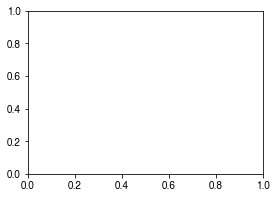

In [7]:
fig=plt.subplots(figsize = (4.2,3.0))
sns.lineplot(data=df_clostest_distances,x='residue',y='$d_{Ca-P}\ (Å)$',hue='experiment',style="experiment",markers=True,ci='sd',palette=[o2,'darkcyan'])
sns.lineplot(data=df_clostest_distances_NMR_deviation,x='residue',y='$d_{deviation,Ca\ P}$',hue='$low,up$',palette=[o2,o2],)

plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.tight_layout()
sns.despine()
plt.xticks(range(0,61,5))
plt.xticks(rotation=55)
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/SI/NMR_cystal_profile',dpi=300,bbox_inches='tight', transparent=True)

NameError: name 'NMR_mean' is not defined

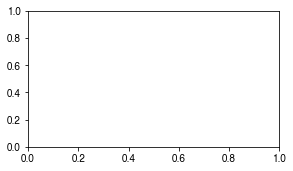

In [8]:
 """Plot dissociation association within 32 Å and sliding versus free diffusion"""

fig, ax = plt.subplots(figsize = (4.5,2.5))


plt.plot(list(range(60)),NMR_mean[0][62:62+60],'-', color='red', label = 'search A')
plt.plot(list(range(60)),NMR_mean[0][0:60],'-', color=p3, label = 'search B')
plt.plot(list(range(60)),cry_mean[0][0:60],'-', color='k', label = 'recognition A')
plt.plot(list(range(60)),cry_mean[0][59:59+60],'-', color=g2, label = 'recognition B')
plt.fill_between(list(range(60)),NMR_mean[0][0:60]-NMR_mean[1][0:60],NMR_mean[0][0:60]+NMR_mean[1][0:60], color='r',alpha=0.4)
plt.fill_between(list(range(60)),NMR_mean[0][62:62+60]-NMR_mean[1][62:62+60],NMR_mean[0][62:62+60]+NMR_mean[1][62:62+60], color=p1)


#plt.fill_between(list(range(60)),cry_mean[0][59:59+60],'-', color='r', label = '$\'recognition\',\ B_{crystal}$')


K_indices = [i for i, s in enumerate(lacIDBDhAA) if ('K') in s]
R_indices = [i for i, s in enumerate(lacIDBDhAA) if ('R') in s]
pos_ind=K_indices+R_indices 

D_indices = [i for i, s in enumerate(lacIDBDhAA) if ('D') in s]
E_indices = [i for i, s in enumerate(lacIDBDhAA) if ('E') in s]
neg_ind=D_indices+E_indices

H_indices = [i for i, s in enumerate(lacIDBDhAA) if ('H') in s]
H_ind=H_indices

spec_ind = [5,15,16,20]

plt.scatter(pos_ind,np.zeros(len(pos_ind)), color = 'blue', label='positive residue')
plt.scatter(neg_ind,np.zeros(len(neg_ind)), color = 'red', label='negative residue')
plt.scatter(H_ind,np.zeros(len(H_ind)), color = 'blue')
plt.scatter(spec_ind,np.zeros(len(spec_ind)), color = 'lime', label='specific residue',alpha=0.6)

plt.xlabel('residue index', fontsize = 12)
plt.ylabel('d (Å)', fontsize = 12)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=True, left=True, labelleft=True,labelsize='small',
    width = 0.5,
    length = 3, color='k',direction ='in')

plt.legend(loc='center left', bbox_to_anchor=(1., 0.5), fontsize = 12)
plt.xticks((range(0,61,10)),(range(2,63,10)), fontsize = 12)
plt.yticks((range(0,31,5)),(range(0,30,5)), fontsize = 12)
#plt.savefig('/Users/mallu899/Dropbox (lkgroup)/lacI_Searching/Figures/Footprint_start_l',dpi=400,bbox_inches='tight', transparent=True)

In [9]:
import matplotlib.pyplot as plt

class analyse_traj:
    
    def COM(data):
        """Get the Coordinates and do the an operation on it."""
        COMl = []
        for frame in data:
            COMl.append(COoperations.COM(Coordinates.get_coord_traj(frame))) 
        return(COMl)
    
    def CZ(data):
        """Get the Coordinates and do the an operation on it."""
        CZl= []
        for frame in data:
             CZl.append(COoperations.CZ(Coordinates.get_coord_traj(frame))) 
        return(CZl)
    
    def CXY(data):
        """Get the Coordinates and do the an operation on it."""
        CXYl = []
        for frame in data:
            CXYl.append(COoperations.CXY(Coordinates.get_coord_traj(frame))) 
        return(CXYl)
    
    def COXY(data):
        """Get the Coordinates and do the an operation on it."""
        COXYl = []
        for frame in data:
            COXYl.append(COoperations.COXY(Coordinates.get_coord_traj(frame))) 
        return(COXYl)

    def CXYCA(data):
        """Get the Coordinates and do the an operation on it."""
        CXYCAl = []
        for frame in data:
            CXYCAl.append(COoperations.CXYCA(Coordinates.get_coord_traj(frame))) 
        return(CXYCAl)
    
def Footprint(file,framecount, step):
    """Get path of all trajectory files in folder and return the Coordinates for all atoms and different regions."""

    Trajs = glob.glob(file)
    Trajs.sort()
    iterator = Iterator.traj
    print(iterator)
    CXI_frame = []
    for Traj in Trajs:
        """Take XY coordinate for each CA bead."""
        CXI_frame.append(analyse_traj.CXYCA(iterator(Traj,framecount,step)))
    Mean_all = []
    STD_all = []
    for frameData in CXI_frame:
        dfi = pd.DataFrame(frameData)
        Mean_all.append(dfi.mean())
        STD_all.append(dfi.std())
    print(Mean_all)
    Mean1=pd.DataFrame(Mean_all)
    Mean = Mean1.mean()
    print(Mean)
    Stdev1 = pd.DataFrame(STD_all)
    Stdev = Stdev1.mean()
    f4 = open('Footprint.txt','w')
    for i in list(range(len(Mean))):
        f4.write('{l:8.3f}  {m:8.3f} \n'.format(l = Mean[i],m=Stdev[i]))
    f4.close()

    return(Mean,Stdev)        


def plot_dif(fileS,fileR, reference = ref):
       
    Mean = []
    Std = []

    PrintS = pd.read_csv(fileS, sep='\s+',header=None)
    meanS = PrintS[0]
    stdevS = PrintS[1]
    
    PrintR = pd.read_csv(fileR, sep='\s+',header=None)
    meanR = PrintR[0]
    stdevR = PrintR[1]
    
    axes = plt.gca()
    #axes.set_ylim([-1,16])
    """Do some analysis on the sequence"""
    
    lacIDBDh='''KPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGASVVVSMVERSGVEACKTA
    VHNLLAQRVSGLIINYPLDDQDAIAVEAAC'''
    
    print(len(lacIDBDh))
    lacIDBDhAA=[x for x in lacIDBDh][0:61]
    print(meanR) 

    protein = ref
    model = int(len(meanR))
    dimer = int(len(protein))
    model_monomer = int(len(meanR)/2)
    monomer = int(dimer/2)
    K_indices = [i for i, s in enumerate(lacIDBDhAA) if ('K') in s]
    R_indices = [i for i, s in enumerate(lacIDBDhAA) if ('R') in s]
    pos_ind=K_indices+R_indices 
    D_indices = [i for i, s in enumerate(lacIDBDhAA) if ('D') in s]
    E_indices = [i for i, s in enumerate(lacIDBDhAA) if ('E') in s]
    neg_ind=D_indices+E_indices
    H_indices = [i for i, s in enumerate(lacIDBDhAA) if ('H') in s]
    H_ind=H_indices

    spec_ind = [5,15,16,20]
    #plt.plot(list(range(61)),meanS[0:61]-reference[0:61],'-', label='S-state A', color=p3)
    #plt.plot(list(range(144)),meanS[0+144:144+144]-reference[359:359+144],'-', label='S-state B', color='orange')
    #plt.plot(list(range(61)),meanS[0+359:61+359]-reference[359:359+61],'-', label='S-state B', color=p2)
    #plt.plot(list(range(61)),meanR[0:61]-reference[0:61],'-', label='R-state A', color=g3)
    #plt.plot(list(range(144)),meanR[0+144:144+144]-reference[359:359+144],'-', label='R-state B', color='lightblue')
    #plt.plot(list(range(61)),meanR[0+359:61+359]-reference[359:359+61],'-', label='R-state B', color=g2)
    #plt.fill_between(list(range(61)),meanS[0:61]-stdevS[0:61],meanS[0:61]+stdevS[0:61],color='purple',alpha=0.3)
    #plt.fill_between(list(range(61)),meanS[0+359:61+359]-stdevS[0+359:61+359],meanS[0+359:61+359]+stdevS[0+359:61+359],color='purple',alpha=0.1)
   # plt.fill_between(list(range(61)),meanR[0:61]-stdevR[0:61],meanR[0:61]+stdevR[0:61],color='green',alpha=0.3)
    #plt.fill_between(list(range(61)),meanR[0+359:61+359]-stdevR[0+359:61+359],meanR[0+359:61+359]+stdevR[0+359:61+359],color='green',alpha=0.1)

    #plt.plot(list(range(61)),meanS[0:61],'-', label='S-state A', color=p3)
    #plt.plot(list(range(144)),meanS[0+144:144+144]-reference[359:359+144],'-', label='S-state B', color='orange')
    #plt.plot(list(range(61)),meanS[0+359:61+359],'-', label='S-state B', color=p1)
    #plt.plot(list(range(61)),meanR[0:61],'-', label='R-state A', color=g3)
    #plt.plot(list(range(144)),meanR[0+144:144+144]-reference[359:359+144],'-', label='R-state B', color='lightblue')
    #plt.plot(list(range(61)),meanR[0+359:61+359],'-', label='R-state B', color=g2)
    plt.scatter(pos_ind,np.zeros(len(pos_ind)), color = 'blue', label='positive',s=1)
    plt.scatter(neg_ind,np.zeros(len(neg_ind)), color = 'red', label='negative',s=1)
    plt.scatter(H_ind,np.zeros(len(H_ind)), color = 'blue',s=0.5)
    plt.scatter(spec_ind,np.zeros(len(spec_ind)), color = 'lime', label='specific',alpha=0.6,s=1)

    plt.plot(list(range(61)),meanS[0:61]-meanR[0:61],'-', label='DBD A', color='k',linewidth=1)
    plt.plot(list(range(61)),meanS[0+359:61+359]-meanR[0+359:61+359],'-.', label='DBD B', color='k',linewidth=0.5)


    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 12)

    plt.ylabel('$\Delta d_{}$ (Å)')

    plt.xlabel('Residue ID')

    #plt.grid() 

    #plt.savefig('/Users/mallu899/Dropbox (lkgroup)/lacI_Searching/Figures/diffusionData/Footprint_dEf.png',dpi=400,bbox_inches='tight')

def plot_MS(file, reference = ref):
       
    Mean = []
    Std = []

    Print = pd.read_csv(file, sep='\s+',header=None)
    mean = Print[0]
    stdev = Print[1]
    fig, ax = plt.subplots(figsize = (3.3,2.))
    axes = plt.gca()
    axes.set_ylim([-3,66])

    print(mean) 

    protein = ref
    model = int(len(mean))
    dimer = int(len(protein))
    model_monomer = int(len(mean)/2)
    monomer = int(dimer/2)

    plt.plot(list(range(90)),mean[0:90],'-', label='S-State A$_{CG-MD}$', color=p3)
    #plt.plot(list(range(90)),mean[144:144+90], label='R-State B$_{CG-MD}$', color='red')
    plt.plot(list(range(90)),mean[359:359+90], label='S-State B$_{CG-MD}$', color=p2)
    plt.plot(list(range(90)),reference[0:90],'-', color=g3, label = 'R-State A$_{crystal}$')
    plt.plot(list(range(90)),reference[359:359+90],'-', color=g2, label = 'R-State B$_{crystal}$')

    plt.fill_between(list(range(90)),mean[0:90]-stdev[0:90],mean[0:90]+stdev[0:90], alpha=0.4, label=None,color='orange',)
    plt.fill_between(list(range(90)),mean[359:359+90]-stdev[359:359+90],mean[359:359+90]+stdev[359:359+90], alpha=0.5, label=None,color='purple')

    plt.ylabel('Distance$_{CA-DNA\ Axis}$ (Å)')

    plt.xlabel('Residue ID')


    """Do some analysis on the sequence"""

    lacIDBDh='''KPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGASVVVSMVERSGVEACKTA
    VHNLLAQRVSGLIINYPLDDQDAIAVEAAC'''
    
    print(len(lacIDBDh))
    lacIDBDhAA=[x for x in lacIDBDh]

    K_indices = [i for i, s in enumerate(lacIDBDhAA) if ('K') in s]

    R_indices = [i for i, s in enumerate(lacIDBDhAA) if ('R') in s]

    pos_ind=K_indices+R_indices 

    D_indices = [i for i, s in enumerate(lacIDBDhAA) if ('D') in s]

    E_indices = [i for i, s in enumerate(lacIDBDhAA) if ('E') in s]

    neg_ind=D_indices+E_indices

    H_indices = [i for i, s in enumerate(lacIDBDhAA) if ('H') in s]

    H_ind=H_indices

    spec_ind = [5,15,16,20]

    plt.scatter(pos_ind,np.zeros(len(pos_ind)), color = 'blue', label='positive')

    plt.scatter(neg_ind,np.zeros(len(neg_ind)), color = 'red', label='negative')

    plt.scatter(H_ind,np.zeros(len(H_ind)), color = 'blue', alpha=0.7)

    plt.scatter(spec_ind,np.zeros(len(spec_ind)), color = 'lime', label='specific',alpha=0.5)
    plt.xlim(-2,90)
    #plt.grid() 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig('/Users/mallu899/Documents/projects/lacI_CG_master/Figures/SFootprint.png',dpi=400,bbox_inches='tight')

NameError: name 'ref' is not defined

In [10]:
plot_MS(BindingProfile+'/Footprint_R01.txt')
#plot_MS(NDimerfull+'/R02F/')

NameError: name 'plot_MS' is not defined

The distances to DNA in the S-sate are close to the one of the specific complex. They are overall slightly elevated, but minima and mixima overlap. The specifically binding residue Tyr7 is less close, possibly because it is close to two negatively charged residues. Specifically interacting residues Tur17 and Glu18 very close to their position in the tight specific complex. The closest interacting area in the non-specific complex is the loop of His29. The N-terminal part of helix 3, with 3 positively charged residues instead is pushed up slightly compared to the specific complex that allows this area to come closer to the DNA, possibly due to DNA-kinking.
For the R-state, most areas interact less close, but the loop around His29 shows the greatest flexibility. and can interact as close as in the S-model. The fit of the structured hinge helixes to the straight DNA results in less interactin of this region, but the core domain of the R_state is closer to DNA again.

In [11]:
def plot_dif(fileS,fileR, reference = ref):
       
    Mean = []
    Std = []

    PrintS = pd.read_csv(fileS, sep='\s+',header=None)
    meanS = PrintS[0]
    stdevS = PrintS[1]
    
    PrintR = pd.read_csv(fileR, sep='\s+',header=None)
    meanR = PrintR[0]
    stdevR = PrintR[1]
    
    axes = plt.gca()
    #axes.set_ylim([-1,16])
    """Do some analysis on the sequence"""
    
    lacIDBDh='''KPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGASVVVSMVERSGVEACKTA
    VHNLLAQRVSGLIINYPLDDQDAIAVEAAC'''
    
    print(len(lacIDBDh))
    lacIDBDhAA=[x for x in lacIDBDh][0:61]
    print(meanR) 

    protein = ref
    model = int(len(meanR))
    dimer = int(len(protein))
    model_monomer = int(len(meanR)/2)
    monomer = int(dimer/2)
    K_indices = [i for i, s in enumerate(lacIDBDhAA) if ('K') in s]
    R_indices = [i for i, s in enumerate(lacIDBDhAA) if ('R') in s]
    pos_ind=K_indices+R_indices 
    D_indices = [i for i, s in enumerate(lacIDBDhAA) if ('D') in s]
    E_indices = [i for i, s in enumerate(lacIDBDhAA) if ('E') in s]
    neg_ind=D_indices+E_indices
    H_indices = [i for i, s in enumerate(lacIDBDhAA) if ('H') in s]
    H_ind=H_indices

    spec_ind = [5,15,16,20]

    sns.lineplot(list(range(61)),meanS[0:61]-meanR[0:61],'-', label='DBD A', color='k',linewidth=1,alpha=0.7)
    sns.lineplot(list(range(61)),meanS[0+359:61+359]-meanR[0+359:61+359],'-.', label='DBD B', color='k',linewidth=0.5)
    plt.scatter(pos_ind,np.zeros(len(pos_ind)), color = 'blue', label='positive',s=1)
    plt.scatter(neg_ind,np.zeros(len(neg_ind)), color = 'red', label='negative',s=1)
    plt.scatter(H_ind,np.zeros(len(H_ind)), color = 'blue',s=0.5)
    plt.scatter(spec_ind,np.zeros(len(spec_ind)), color = 'lime', label='specific',alpha=0.6,s=1)



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 12)

    plt.ylabel('$\Delta d_{}$ (Å)')

    plt.xlabel('Residue ID')

NameError: name 'ref' is not defined

In [12]:
BindingProfile='/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/BindingProfile' 

In [13]:
distance_Ca_DNA_S01= pd.read_csv(BindingProfile+'/Footprint_S01.txt', sep='\s+',header=None)
distance_Ca_DNA_R01 = pd.read_csv(BindingProfile+'/Footprint_R01.txt', sep='\s+',header=None)
df_clostest_distances_SvsR=pd.DataFrame({'residue':lacI_DBD_sequence+lacI_DBD_sequence,'$d (Å)$':list(distance_Ca_DNA_S01[0][0:60])\
              +list(distance_Ca_DNA_R01[0][0:60]),'conformation':['$search$' for x in range(0,60)]+['$recognition$' for x in range(0,60)]})

In [18]:
df_clostest_distances_SvsR

,residue,$d (Å)$,conformation
0,K2,19.046,$search$
1,P3,20.674,$search$
2,V4,20.446,$search$
3,T5,17.171,$search$
4,L6,16.649,$search$
...,...,...,...
115,A57,14.437,$recognition$
116,G58,16.506,$recognition$
117,K59,18.673,$recognition$
118,Q60,21.283,$recognition$


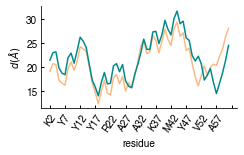

In [17]:
fig, ax = plt.subplots(figsize = (3.5,2.1))
sns.lineplot(data=df_clostest_distances_SvsR,x='residue',y='$d (Å)$',hue='conformation',style="conformation",markers=True,ci='sd',palette=[o2,'darkcyan'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.tight_layout()
sns.despine()
plt.xticks(range(0,61,5))
plt.xticks(rotation=55)
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/SI/S_vs_R_profile',dpi=300,bbox_inches='tight', transparent=True)

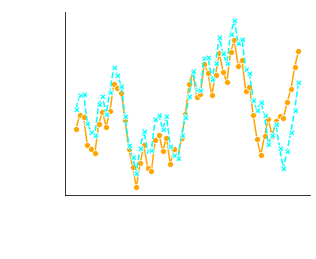

In [25]:
fig=plt.subplots(figsize = (4.5,3.7),frameon=False,edgecolor='white')
sns.lineplot(data=df_clostest_distances_SvsR,x='residue',y='$d (Å)$',hue='conformation',style="conformation",markers=True,ci='sd',palette=['orange','cyan'])


plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='white',direction ='in')
#plt.title('full dimer')
plt.legend(title='conformation',edgecolor='white',loc='upper left',bbox_to_anchor=(1., 1.15),
           markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3)
plt.legend([],[], frameon=False)
sns.despine()
#plt.ylim(-5,220)
#plt.xlim(0.008,0.045)
plt.ylabel('d (Å))',fontsize = 16,color='white')
plt.xlabel('residues',fontsize = 16,color='white')
plt.xticks(range(0,61,5),fontsize = 16,color='white',rotation=55)
plt.yticks(fontsize = 16,color='white')
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/SI/S_vs_R_profile_presi',dpi=300,bbox_inches='tight', transparent=True)

For the crystal structure, the whole protein is between 6-10 Å further away from the DNA. The bindning domain, especially helix 1 and 2 are relatively close, the His29 loop is the point that gets closest. Coparing to the S state, H1 and H2 can be closer to the DNA, specifically inding residuesare closer than in the R, but the difference between R and S is less pronounces. The loop with His29 and Arg22 get much closer in S. The N-terminal end of H3 is similarly far away in S, like in R, but here is some difference between the protomers, B is interacting clsoer here. The hinge helices are the same again in R, but they differ in S. The C-terminal region of H3, with more negative residues is closer for the S as well, which couls result in some repuslion.The hinge region introduces a clear break in the protein for the S-state. The core is further away from the DNA and therefore the DNA-binding regions of the protein. The protein in the R-state is more compact and the core is closer to the DNA. Formation of the kink would result in even closer contatc between the protein core and the DNA backbone. (Is there an effect of charges of the core.)

If one substaracts the mean distances from the DNA axis for the R state from the S-sate, negative values indicate regions where the S-state residues are closer to the DNA, positive values show where the R-state is closer to DNA. The S-sate HTH motiv is interacting more closely in general. But especially one region of the hinge helixes is much closer to DNA in the R-sate. This is around Lys59. All in all, positively charged regions are similarly close, despite Arg22 that is much closer in the S-state. Othersie, negtively charges regions of H1 and H3 are closer in the S-sate. The N-terminal Lys2 is also closer in the S-state. For the core. the R-state residues are slightly closer overall, but they cannot contribute much to the non-specific interaction because they are generally too far away from the DNA.

What are really the specific residues, measure the distances: WHich ones can be established already in the S state?
